## IMDB Sentiment Analysis Project with NLTK

### importing packages and cleaning data

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [65]:
movie_reviews = pd.read_csv("IMDB Dataset.csv")
movie_reviews

import re
CLEANR = re.compile('<.*?>') 
for i in range(movie_reviews.shape[0]):
    movie_reviews['review'].replace(movie_reviews.get('review').iloc[i], re.sub(CLEANR, ' ', movie_reviews.get('review').iloc[i]), inplace=True)
    #movie_review.get('review').iloc[i] = re.sub(CLEANR, ' ', movie_reviews.get('review').iloc[0])
movie_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming t...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### using VADER (Valence Aware Dictionary for Sentiment Reasoning)

In [94]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [43]:
movie_reviews['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [116]:
movie_reviews['scores'] = movie_reviews['review'].apply(lambda review: sia.polarity_scores(review))
movie_reviews['compound']  = movie_reviews['scores'].apply(lambda scores: scores['compound'])
movie_reviews['comp_score'] = movie_reviews['compound'].apply(lambda compound: 'positive' if compound >=0 else 'negative')
movie_reviews.head()

,review,sentiment,scores,compound,comp_score
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.206, 'neu': 0.745, 'pos': 0.049, 'co...",-0.9951,negative
1,A wonderful little production. The filming t...,positive,"{'neg': 0.055, 'neu': 0.768, 'pos': 0.177, 'co...",0.9641,positive
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.093, 'neu': 0.689, 'pos': 0.218, 'co...",0.9780,positive
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.14, 'neu': 0.773, 'pos': 0.088, 'com...",-0.8819,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.052, 'neu': 0.786, 'pos': 0.162, 'co...",0.9803,positive


In [117]:
movie_reviews.sort_values(by='compound',ascending = False)#.get('review').iloc[0]

,review,sentiment,scores,compound,comp_score
42946,By now you've probably heard a bit about the n...,positive,"{'neg': 0.048, 'neu': 0.744, 'pos': 0.209, 'co...",0.9999,positive
29425,By 1987 Hong Kong had given the world such fil...,positive,"{'neg': 0.073, 'neu': 0.679, 'pos': 0.248, 'co...",0.9998,positive
28525,Jim Carrey is back to much the same role that ...,positive,"{'neg': 0.059, 'neu': 0.698, 'pos': 0.243, 'co...",0.9998,positive
37860,"My Comments for VIVAH :- Its a charming, ideal...",positive,"{'neg': 0.035, 'neu': 0.701, 'pos': 0.263, 'co...",0.9998,positive
16498,The quintessential Georgian film of Georgi Dan...,positive,"{'neg': 0.037, 'neu': 0.684, 'pos': 0.279, 'co...",0.9998,positive
...,...,...,...,...,...
4864,"**SPOILERS**Actually based on the novel ""The B...",positive,"{'neg': 0.241, 'neu': 0.685, 'pos': 0.074, 'co...",-0.9996,negative
36200,Orca starts as crusty Irish sea captain Nolan ...,negative,"{'neg': 0.273, 'neu': 0.646, 'pos': 0.081, 'co...",-0.9996,negative
21342,The main achievement of this film is that thou...,positive,"{'neg': 0.212, 'neu': 0.713, 'pos': 0.075, 'co...",-0.9996,negative
45221,"""Nobi"" or ""Fires On the Plain"" is a film that ...",positive,"{'neg': 0.271, 'neu': 0.652, 'pos': 0.078, 'co...",-0.9997,negative


In [169]:
pos_pos = movie_reviews[(movie_reviews.get('sentiment') == 'positive') & (movie_reviews.get('comp_score') == 'positive')].shape[0]
print('Correctly identified as positive: '  + \
      str(pos_pos) \
      + ' (' + str(round(pos_pos / movie_reviews.shape[0], 3) * 100) \
      + '%)')

neg_neg = movie_reviews[(movie_reviews.get('sentiment') == 'negative') & (movie_reviews.get('comp_score') == 'negative')].shape[0]
print('Correctly identified as negative: '  + \
      str(neg_neg) \
      + ' (' + str(round(neg_neg / movie_reviews.shape[0], 3) * 100) \
      + '%)')

neg_pos = movie_reviews[(movie_reviews.get('sentiment') == 'negative') & (movie_reviews.get('comp_score') == 'positive')].shape[0]
print('Incorrectly identified as positive: '  + \
      str(neg_pos) \
      + ' (' + str(round(neg_pos / movie_reviews.shape[0], 3) * 100) \
      + '%)')

pos_neg = movie_reviews[(movie_reviews.get('sentiment') == 'positive') & (movie_reviews.get('comp_score') == 'negative')].shape[0]
print('Incorrectly identified as negative: '  + \
      str(pos_neg) \
      + ' (' + str(round(pos_neg / movie_reviews.shape[0], 3) * 100) \
      + '%)')

Correctly identified as positive: 21447 (42.9%)
Correctly identified as negative: 13436 (26.900000000000002%)
Incorrectly identified as positive: 11564 (23.1%)
Incorrectly identified as negative: 3553 (7.1%)


In [198]:
int_pos = movie_reviews[(movie_reviews.get('sentiment') == 'positive')].shape[0]
int_neg = movie_reviews[(movie_reviews.get('sentiment') == 'negative')].shape[0]
nltk_pos = movie_reviews[(movie_reviews.get('comp_score') == 'positive')].shape[0]
nltk_neg = movie_reviews[(movie_reviews.get('comp_score') == 'negative')].shape[0]

### visualizations

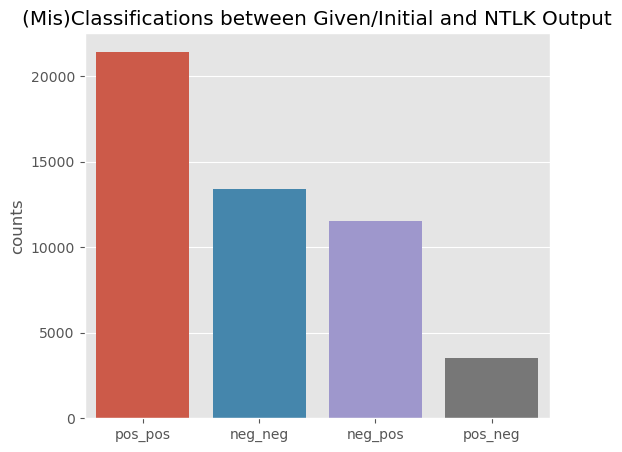

In [203]:
vis_df = pd.DataFrame({'counts': [pos_pos, neg_neg, neg_pos, pos_neg]}, index = ['pos_pos', 'neg_neg', 'neg_pos', 'pos_neg'])
plt.figure(figsize=(6,5))
ax = sns.barplot(x= vis_df.index, y='counts', data=vis_df, order = ['pos_pos', 'neg_neg', 'neg_pos', 'pos_neg']).set(title='(Mis)Classifications between Given/Initial and NTLK Output')

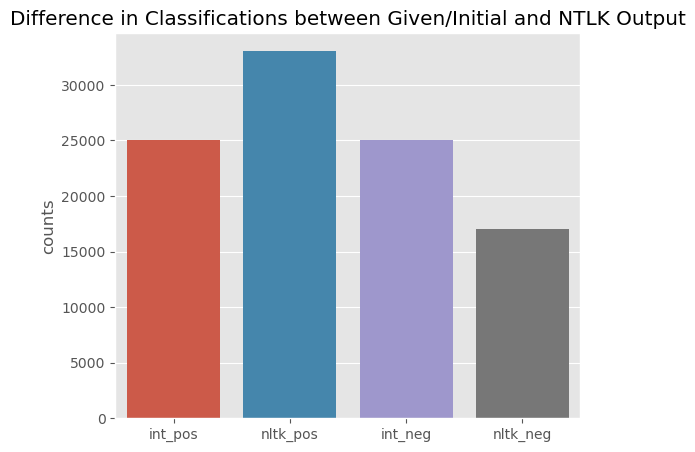

In [206]:
vis_df2 = pd.DataFrame({'counts': [int_pos, nltk_pos, int_neg, nltk_neg]}, index = ['int_pos', 'nltk_pos', 'int_neg', 'nltk_neg'])
plt.figure(figsize=(6,5))
ax = sns.barplot(x= vis_df2.index, y='counts', data=vis_df2, order = ['int_pos', 'nltk_pos', 'int_neg', 'nltk_neg']).set(title='Difference in Classifications between Given/Initial and NTLK Output')

### conclusion

Utilziing NTLK's SentimentIntensityAnalyzer, I created a model which misclassified nearly 30% of the 50,000 IMDB reviews which had initial classifications of either positive or negative. It is also readily apparent that NLTK's errors classified more reviews as positive than negative. I would like to thank Aditya Beri for his article, "SENTIMENTAL ANALYSIS USING VADER." and Rob Mulla for his YouTube tutorial using NLTK to classify Amazon reviews.